In [2]:
import sqlite3
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pygenesys as pg
from plotter import *
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,12)

In [3]:
files = glob.glob('../data/results/installed_capacity_365_*.csv')
files.sort()
files

['../data/results/installed_capacity_365_LC.csv',
 '../data/results/installed_capacity_365_XN.csv',
 '../data/results/installed_capacity_365_ZAN.csv',
 '../data/results/installed_capacity_365_ZN.csv']

In [7]:
df = pd.read_csv(files[0], index_col='year')
df

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM
year,,,,,,,
2025,7505.90,9317.8133,16371.60,0.000,12420.0,6471.5138,6387.8200
2030,5045.24,11773.7870,16332.70,12973.058,12420.0,15513.5170,5708.4600
2035,2815.74,13589.4500,15903.98,14160.821,12420.0,17606.8660,3303.6200
2040,2444.40,15053.9970,5023.32,14801.370,12420.0,23597.0890,2044.2422
2045,2357.04,16327.0380,688.80,15744.616,12420.0,26505.4670,1692.0123
2050,2255.60,17007.3310,688.80,16918.142,12420.0,27609.8610,1762.5128


In [9]:
frames = []

for file in files:
    print(file)
    df = pd.read_csv(file, index_col='year')
    df = df[df.index==2030]
    frames.append(df)

full_df = pd.concat(frames)
full_df

../data/results/installed_capacity_365_LC.csv
../data/results/installed_capacity_365_XN.csv
../data/results/installed_capacity_365_ZAN.csv
../data/results/installed_capacity_365_ZN.csv


,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,BIOMASS,COAL_ADV,NATGAS_ADV
year,,,,,,,,,,
2030,5045.24,11773.787,16332.7,12973.0580,12420.0,15513.517,5708.4600,NaN,NaN,NaN
2030,5045.24,14767.590,16332.7,2241.8669,12420.0,30963.052,6534.5541,12881.981,9.567154e-07,0.0
2030,5045.24,14717.456,16332.7,NaN,12420.0,30518.183,7305.7442,16281.903,NaN,NaN
2030,5045.24,18130.629,16332.7,NaN,9387.2,34609.616,9727.9695,19677.392,NaN,NaN


In [10]:
index = ['LC', 'XN','ZAN', 'ZN']
full_df.index = index
full_df

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,BIOMASS,COAL_ADV,NATGAS_ADV
LC,5045.24,11773.787,16332.7,12973.0580,12420.0,15513.517,5708.4600,NaN,NaN,NaN
XN,5045.24,14767.590,16332.7,2241.8669,12420.0,30963.052,6534.5541,12881.981,9.567154e-07,0.0
ZAN,5045.24,14717.456,16332.7,NaN,12420.0,30518.183,7305.7442,16281.903,NaN,NaN
ZN,5045.24,18130.629,16332.7,NaN,9387.2,34609.616,9727.9695,19677.392,NaN,NaN


In [11]:
full_df.drop(columns=['COAL_ADV', 'NATGAS_ADV'], inplace=True)
full_df

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,BIOMASS
LC,5045.24,11773.787,16332.7,12973.0580,12420.0,15513.517,5708.4600,NaN
XN,5045.24,14767.590,16332.7,2241.8669,12420.0,30963.052,6534.5541,12881.981
ZAN,5045.24,14717.456,16332.7,NaN,12420.0,30518.183,7305.7442,16281.903
ZN,5045.24,18130.629,16332.7,NaN,9387.2,34609.616,9727.9695,19677.392


In [12]:
full_df.fillna(0)

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,BIOMASS
LC,5045.24,11773.787,16332.7,12973.0580,12420.0,15513.517,5708.4600,0.000
XN,5045.24,14767.590,16332.7,2241.8669,12420.0,30963.052,6534.5541,12881.981
ZAN,5045.24,14717.456,16332.7,0.0000,12420.0,30518.183,7305.7442,16281.903
ZN,5045.24,18130.629,16332.7,0.0000,9387.2,34609.616,9727.9695,19677.392


In [31]:
keys = list(full_df.columns)
values = [5045.24, 1000, 16332.7, 0.00, 12420.0, 17000, 6300, 0.00]
mydict = {}
for i, j in zip(keys, values):
    mydict[i] = [j]

# mydict['index'] = ['CEJA']

ceja_df = pd.DataFrame(mydict)
ceja_df.index = ['CEJA']
ceja_df

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,BIOMASS
CEJA,5045.24,1000,16332.7,0.0,12420.0,17000,6300,0.0


In [32]:
full_df = pd.concat([full_df, ceja_df])

In [34]:
full_df.fillna(0, inplace=True)
full_df

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,BIOMASS
LC,5045.24,11773.787,16332.7,12973.0580,12420.0,15513.517,5708.4600,0.000
XN,5045.24,14767.590,16332.7,2241.8669,12420.0,30963.052,6534.5541,12881.981
ZAN,5045.24,14717.456,16332.7,0.0000,12420.0,30518.183,7305.7442,16281.903
ZN,5045.24,18130.629,16332.7,0.0000,9387.2,34609.616,9727.9695,19677.392
CEJA,5045.24,1000.000,16332.7,0.0000,12420.0,17000.000,6300.0000,0.000


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.use("pgf")
plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"

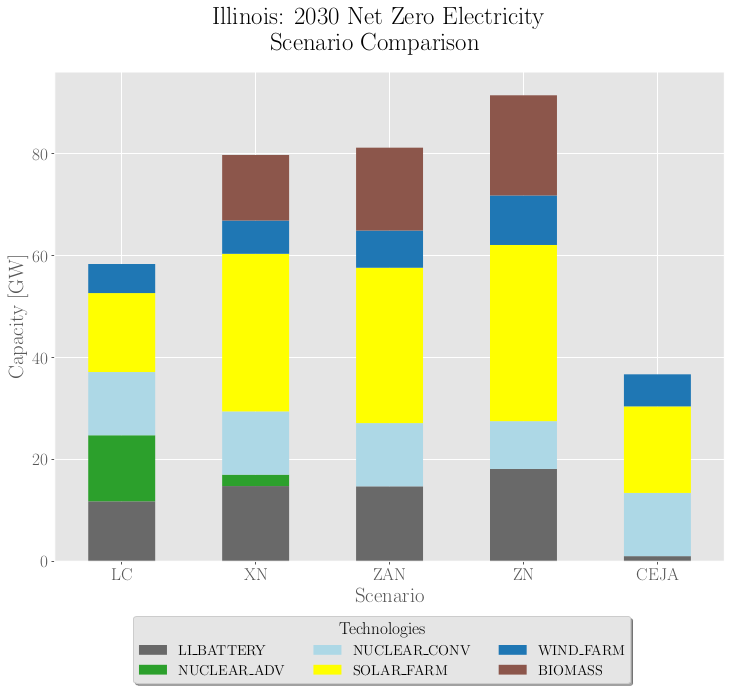

In [71]:
fig, ax = plt.subplots(figsize=(12,9))
(full_df.drop(columns=['COAL_CONV', 'NATGAS_CONV'])/1000).plot.bar(ax=ax,stacked=True, color=elc_colors, legend=False)
plt.ylabel('Capacity [GW]', fontsize=20)
plt.xlabel('Scenario', fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(rotation=0, fontsize=16)

legend = plt.figlegend(bbox_to_anchor=(0.8,0.05), ncol=3, 
              fontsize=14, shadow=True, title='Technologies')
plt.suptitle('Illinois: 2030 Net Zero Electricity\n Scenario Comparison \n', fontsize=24)
plt.setp(legend.get_title(),fontsize=16)
plt.savefig('../thesis/figures/il_scenario_comparison_2030.pgf')